JULIAN DAVID GÓMEZ HENAO

Laboratorio  1

Usando el dataset de Alzheimer

1. Análisis preliminar del problema

a) El siguiente analisis seria un problema de CLASIFICACION, ya que el target seria el diagnostico de la enfermedad y se utilizan las etiquetas: 1- si tiene el diagnostico(alzheimer), o, 0 si no lo tiene. No seria un problema de regresion pues este genera predicciones con valores continuos. En este caso yo no podria decir que un paciente tiene 0.5 de alzheimer.

b) La base de datos consta de 35 caracteristicas:

    NUMERICAS CONTINUAS: 
    -BMI(Body Mass Index of the patients, ranging from 15 to 40.)
    -AlcoholConsumption( Weekly alcohol consumption in units, ranging from 0 to 20)
    -PhysicalActivity(Weekly physical activity in hours, ranging from 0 to 10.)
    -DietQuality(Diet quality score, ranging from 0 to 10.)
    -SleepQuality (Sleep quality score, ranging from 4 to 10.)
    -CholesterolTotal (Total cholesterol levels, ranging from 150 to 300 mg/dL.)
    -CholesterolLDL (Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.)
    -CholesterolHDL (High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.)
    -CholesterolTriglycerides (Triglycerides levels, ranging from 50 to 400 mg/dL)
    -MMSE (Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.)
    -FunctionalAssessment(Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.)
    -ADL (La escala va de 0 a 10, los puntajes más bajos reflejan una mayor discapacidad.) -Age
    (Aunque el autor lo trata como un entero, al momento de procesar los datos, es mas eficiente si se procesa como varible continua). Lo mismo para:  
    -SystolicBP (Systolic blood pressure, ranging from 90 to 180 mmHg) 
    -DiastolicBP ( Diastolic blood pressure, ranging from 60 to 120 mmHg.)
    
    NUMERICAS DISCRETAS:
    

    BINARIAS
    Smoking-FamilyHistoryAlzheimers-CardiovascularDisease-Diabetes-Depression-HeadInjury
    Hypertension-MemoryComplaints-BehavioralProblems-Confusion-Disorientation-PersonalityChanges	
    DifficultyCompletingTasks-Forgetfulness-Diagnosis(Este es el target)

    CATEGORICA NOMINAL
    Doctor in Charge - Gender (0:Male - 1:Female)  - Ethnicity (0: Caucasian - 1: African American - 2: Asian - 3: Other)- PatientID

    CATEGORICA ORDINAL
    -EducationLevel (0: None - 1: High School - 2: Bachelor's - 3: Higher)

C) 
La base de datos fue construida con un fin didáctico, ideal para el desarrollo de modelos predictivos de Machine Learning y análisis estadísticos. A diferencia de un estudio clínico formal, este dataset no parece haber seguido un protocolo de adquisición único, lo cual se evidencia en la descripción de Kaggle, que menciona que los datos fueron 'recopilados de múltiples fuentes'.
Esto sugiere que es un dataset sintético y original, curado por el autor con la finalidad de ofrecer una herramienta completa para el entrenamiento de modelos

 2. Análisis Exploratorio De Datos EDA 

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import Input




In [100]:
dataset=pd.read_csv("alzheimers_disease_data.csv")
# Muestra las primeras 5 filas del DataFrame
print("Primeras 5 filas del dataset:")
dataset.head()


Primeras 5 filas del dataset:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [101]:

# Obtiene la dimensión del DataFrame (filas, columnas)
dataset.shape


(2149, 35)

In [102]:

# Muestra información de las columnas, tipos de datos y valores no nulos
print("\nInformación del dataset:")
dataset.info()



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes              

In [103]:

# Estadísticos descriptivos de las variables numéricas
print("\nEstadísticos descriptivos de las variables numéricas:")
dataset.describe().T


Estadísticos descriptivos de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


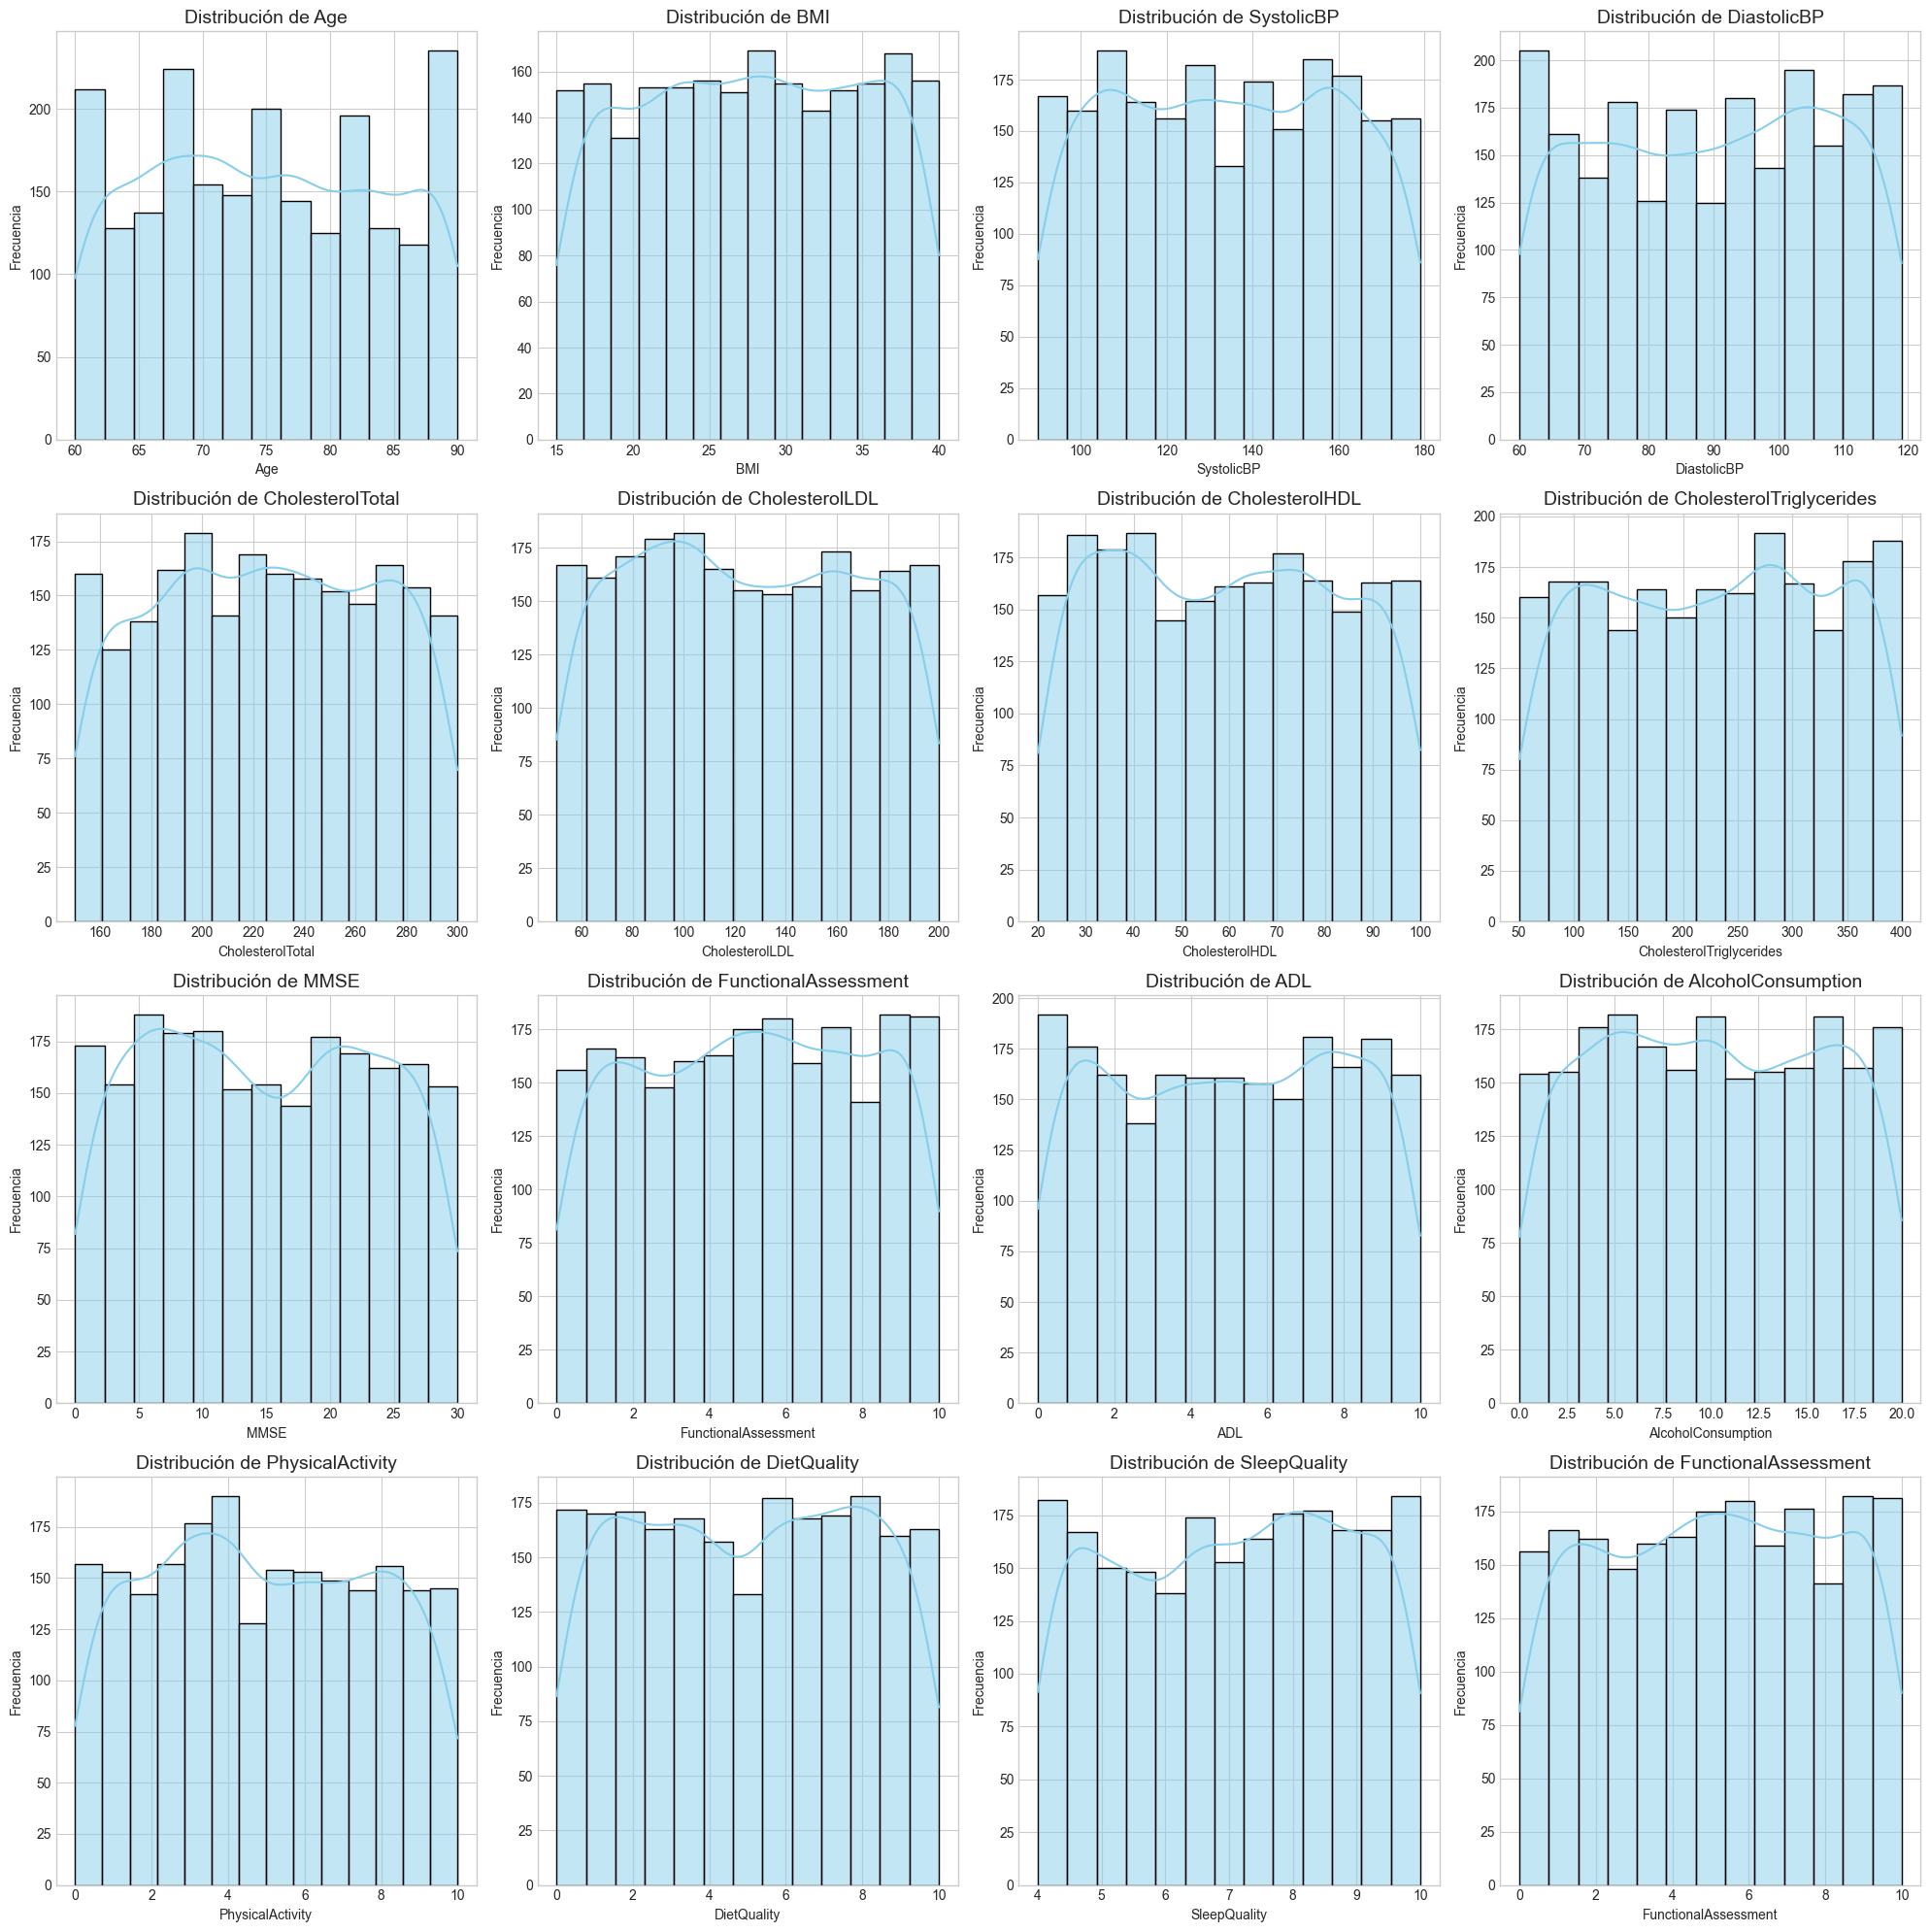

In [104]:
# Variables numéricas continuas que tienen un rango amplio de valores
numerical_cols = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 
                  'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 
                  'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL', 
                  'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality','FunctionalAssessment']

# Se determina el número de filas y columnas para los subplots
n_cols = 4
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Crea la figura y los subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Itera a través de las columnas numéricas y crea un histograma para cada una
for i, col in enumerate(numerical_cols):
    sns.histplot(data=dataset, x=col, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Oculta los ejes no utilizados si hay más subplots que columnas
for j in range(len(numerical_cols), len(axes)):
   axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Age: Permite ver la distribución de edades de los pacientes. Si hay muchos adultos mayores, es relevante porque la edad es un factor de riesgo de Alzheimer.

BMI: Ayuda a identificar si la obesidad o el bajo peso podrían correlacionarse con la enfermedad.

SystolicBP y DiastolicBP: Ver la presión arterial ayuda a detectar posibles riesgos cardiovasculares que pueden afectar la cognición.

CholesterolTotal, LDL, HDL, Triglycerides: Distribuciones amplias o sesgadas pueden indicar pacientes con alto riesgo de problemas metabólicos.

MMSE, FunctionalAssessment, ADL: Muestran el estado cognitivo y funcional. Distribuciones bajas pueden indicar pacientes con mayor probabilidad de Alzheimer.

AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality: Permiten evaluar hábitos de vida que pueden ser factores de riesgo modificables. Valores extremos o distribuciones sesgadas pueden sugerir subgrupos de pacientes con patrones de riesgo diferentes.

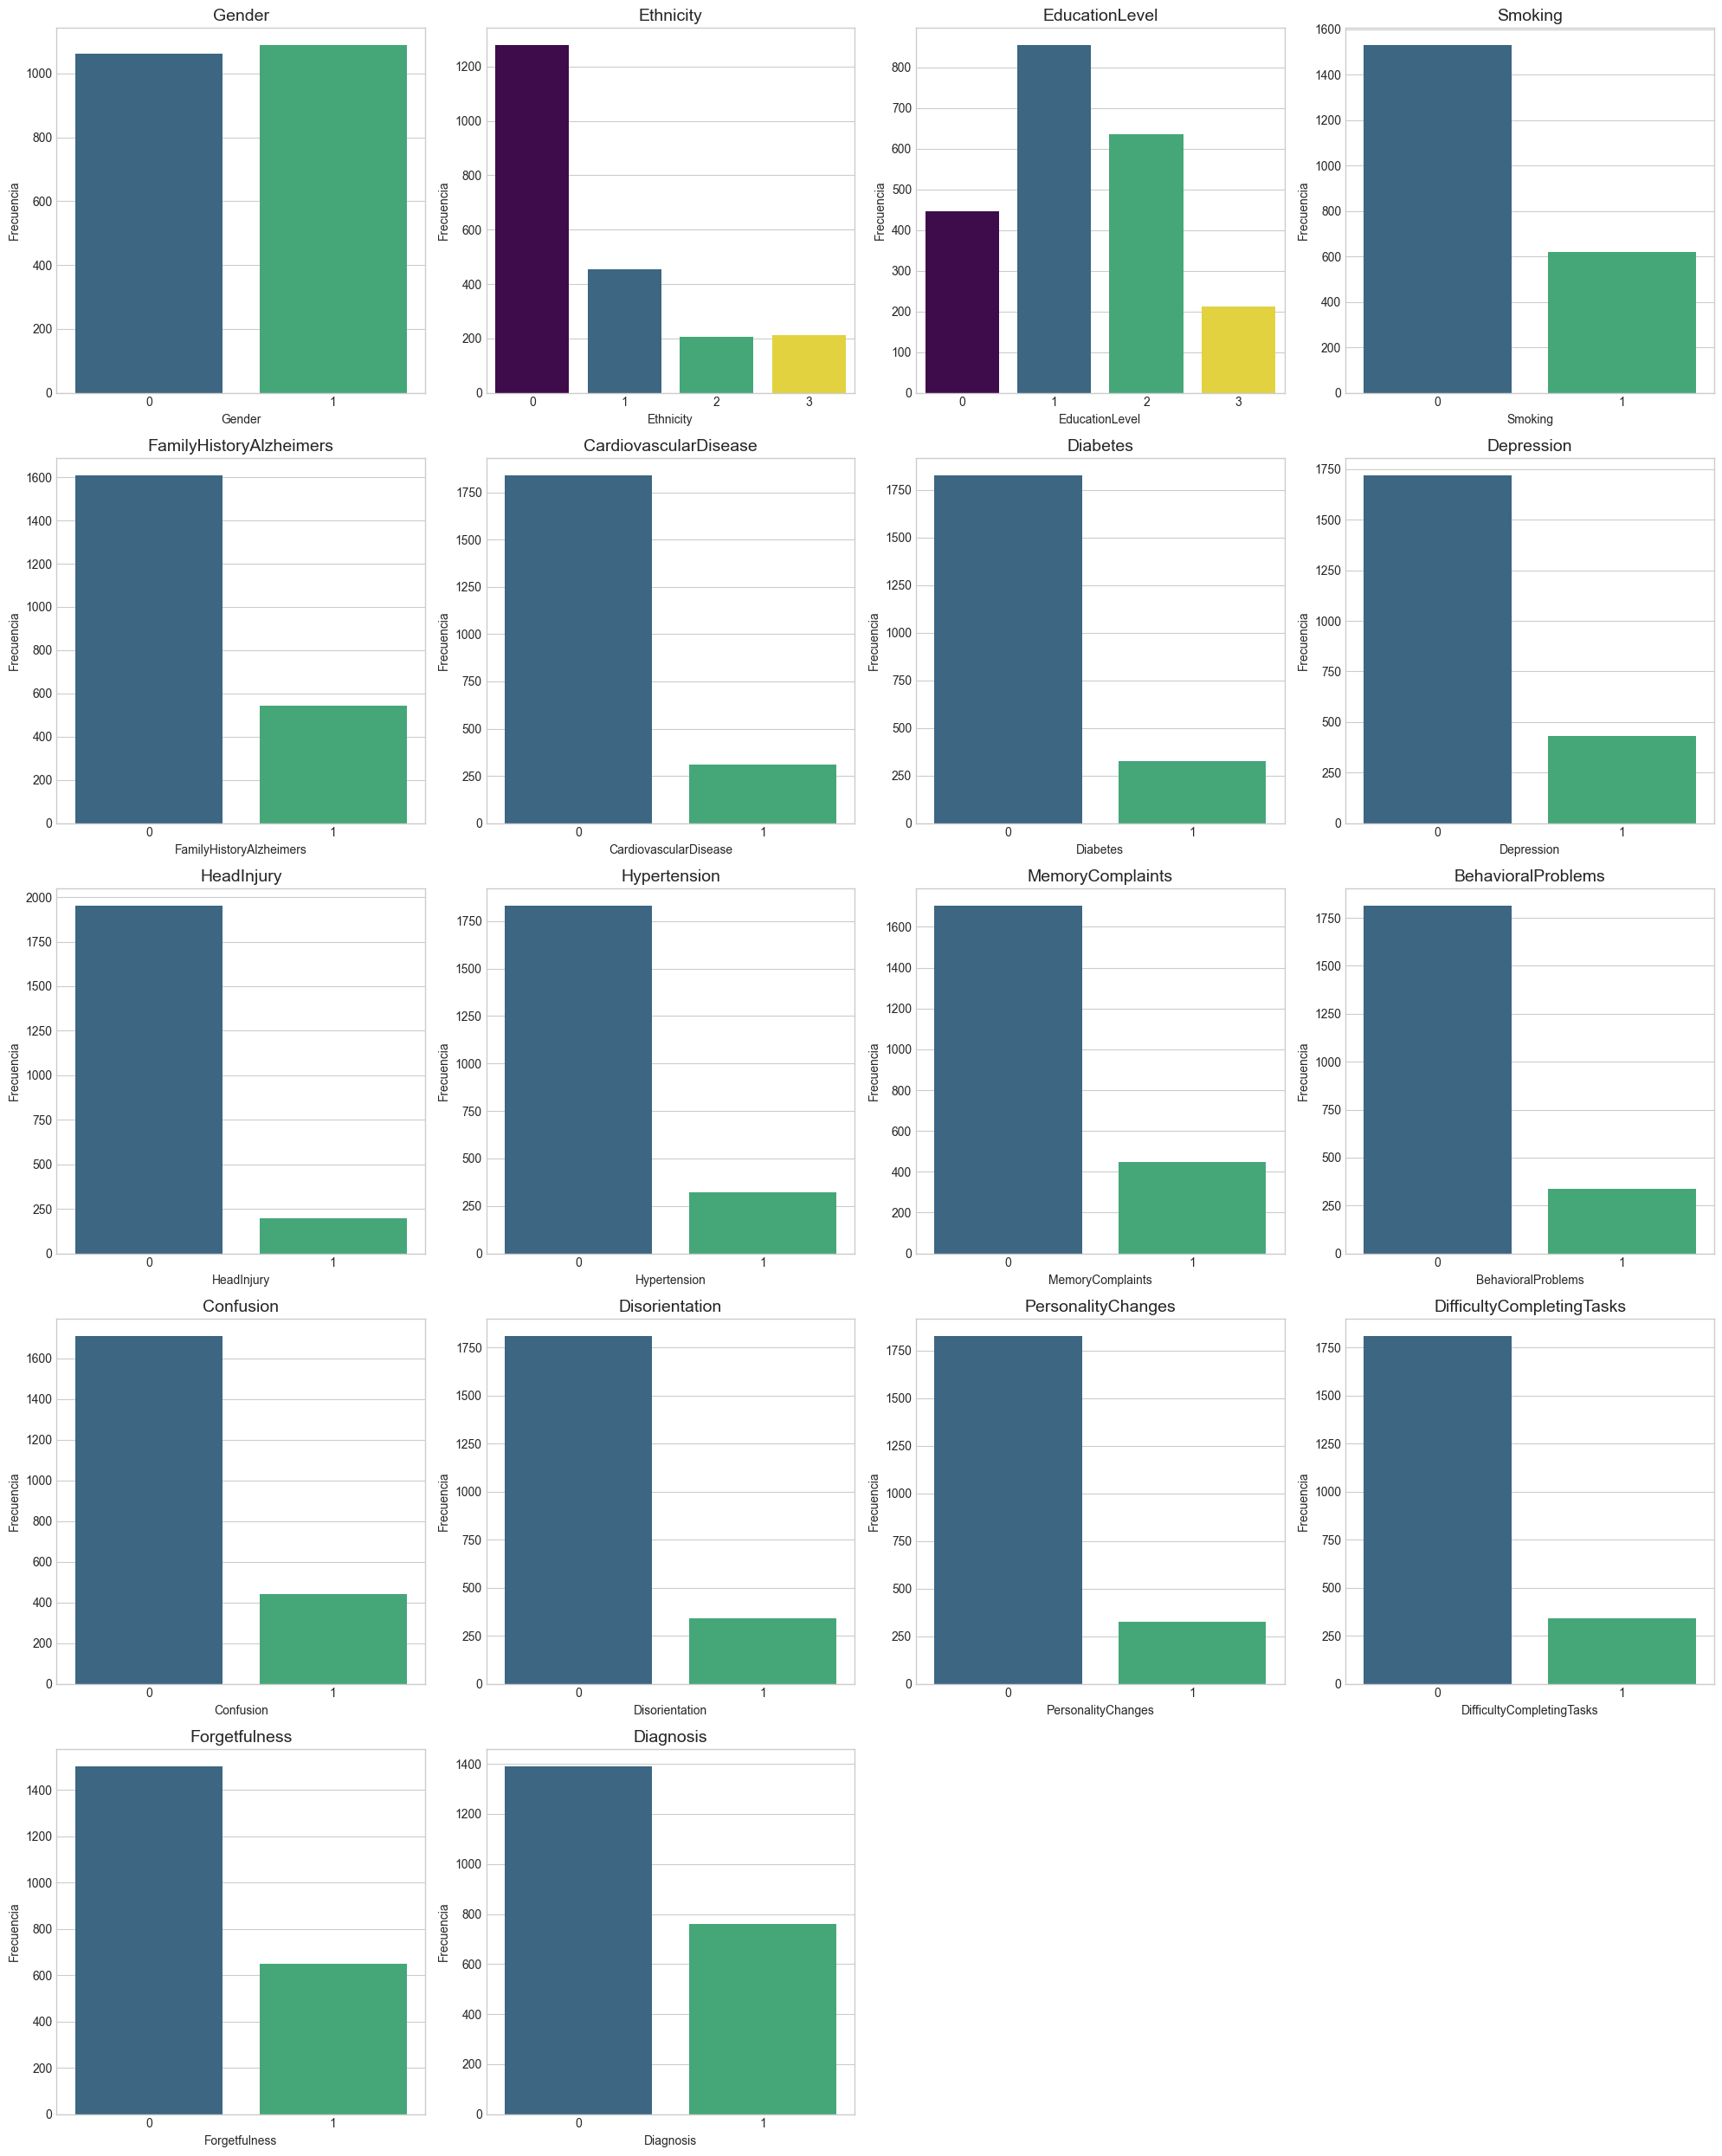

In [105]:
# Lista de variables categóricas y binarias a graficar
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 
                    'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 
                    'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 
                    'Confusion', 'Disorientation', 'PersonalityChanges', 
                    'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

# Establece el número de filas y columnas para los subplots
n_cols_cat = 4
n_rows_cat = int(np.ceil(len(categorical_cols) / n_cols_cat))

# Crea la figura y los subplots
fig, axes = plt.subplots(nrows=n_rows_cat, ncols=n_cols_cat, figsize=(20, 5 * n_rows_cat))
axes = axes.flatten()

# Itera a través de las columnas categóricas y crea un gráfico de conteo
for i, col in enumerate(categorical_cols):
    sns.countplot(data=dataset, x=col, ax=axes[i], palette='viridis', hue=col, legend=False)
    axes[i].set_title(f'{col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Oculta los ejes no utilizados
for j in range(len(categorical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Gender, Ethnicity, EducationLevel: Permite observar la distribución de pacientes según género, grupo étnico y nivel educativo. Información útil para detectar desbalance que pueda afectar al modelo.

Smoking, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, etc: Estas variables binarias muestran frecuencia de presencia o ausencia de factores de riesgo. Ayudan a identificar qué factores podrían correlacionar con un diagnóstico positivo.

MemoryComplaints, BehavioralProblems, Confusion, etc: Indican síntomas clínicos que pueden predecir Alzheimer. Si la mayoría de pacientes con un síntoma dado son positivos, la variable será predictora fuerte.

Diagnosis: Permite ver la proporción de positivos vs. negativos en el dataset. Importante para decidir estrategias de balanceo de clases

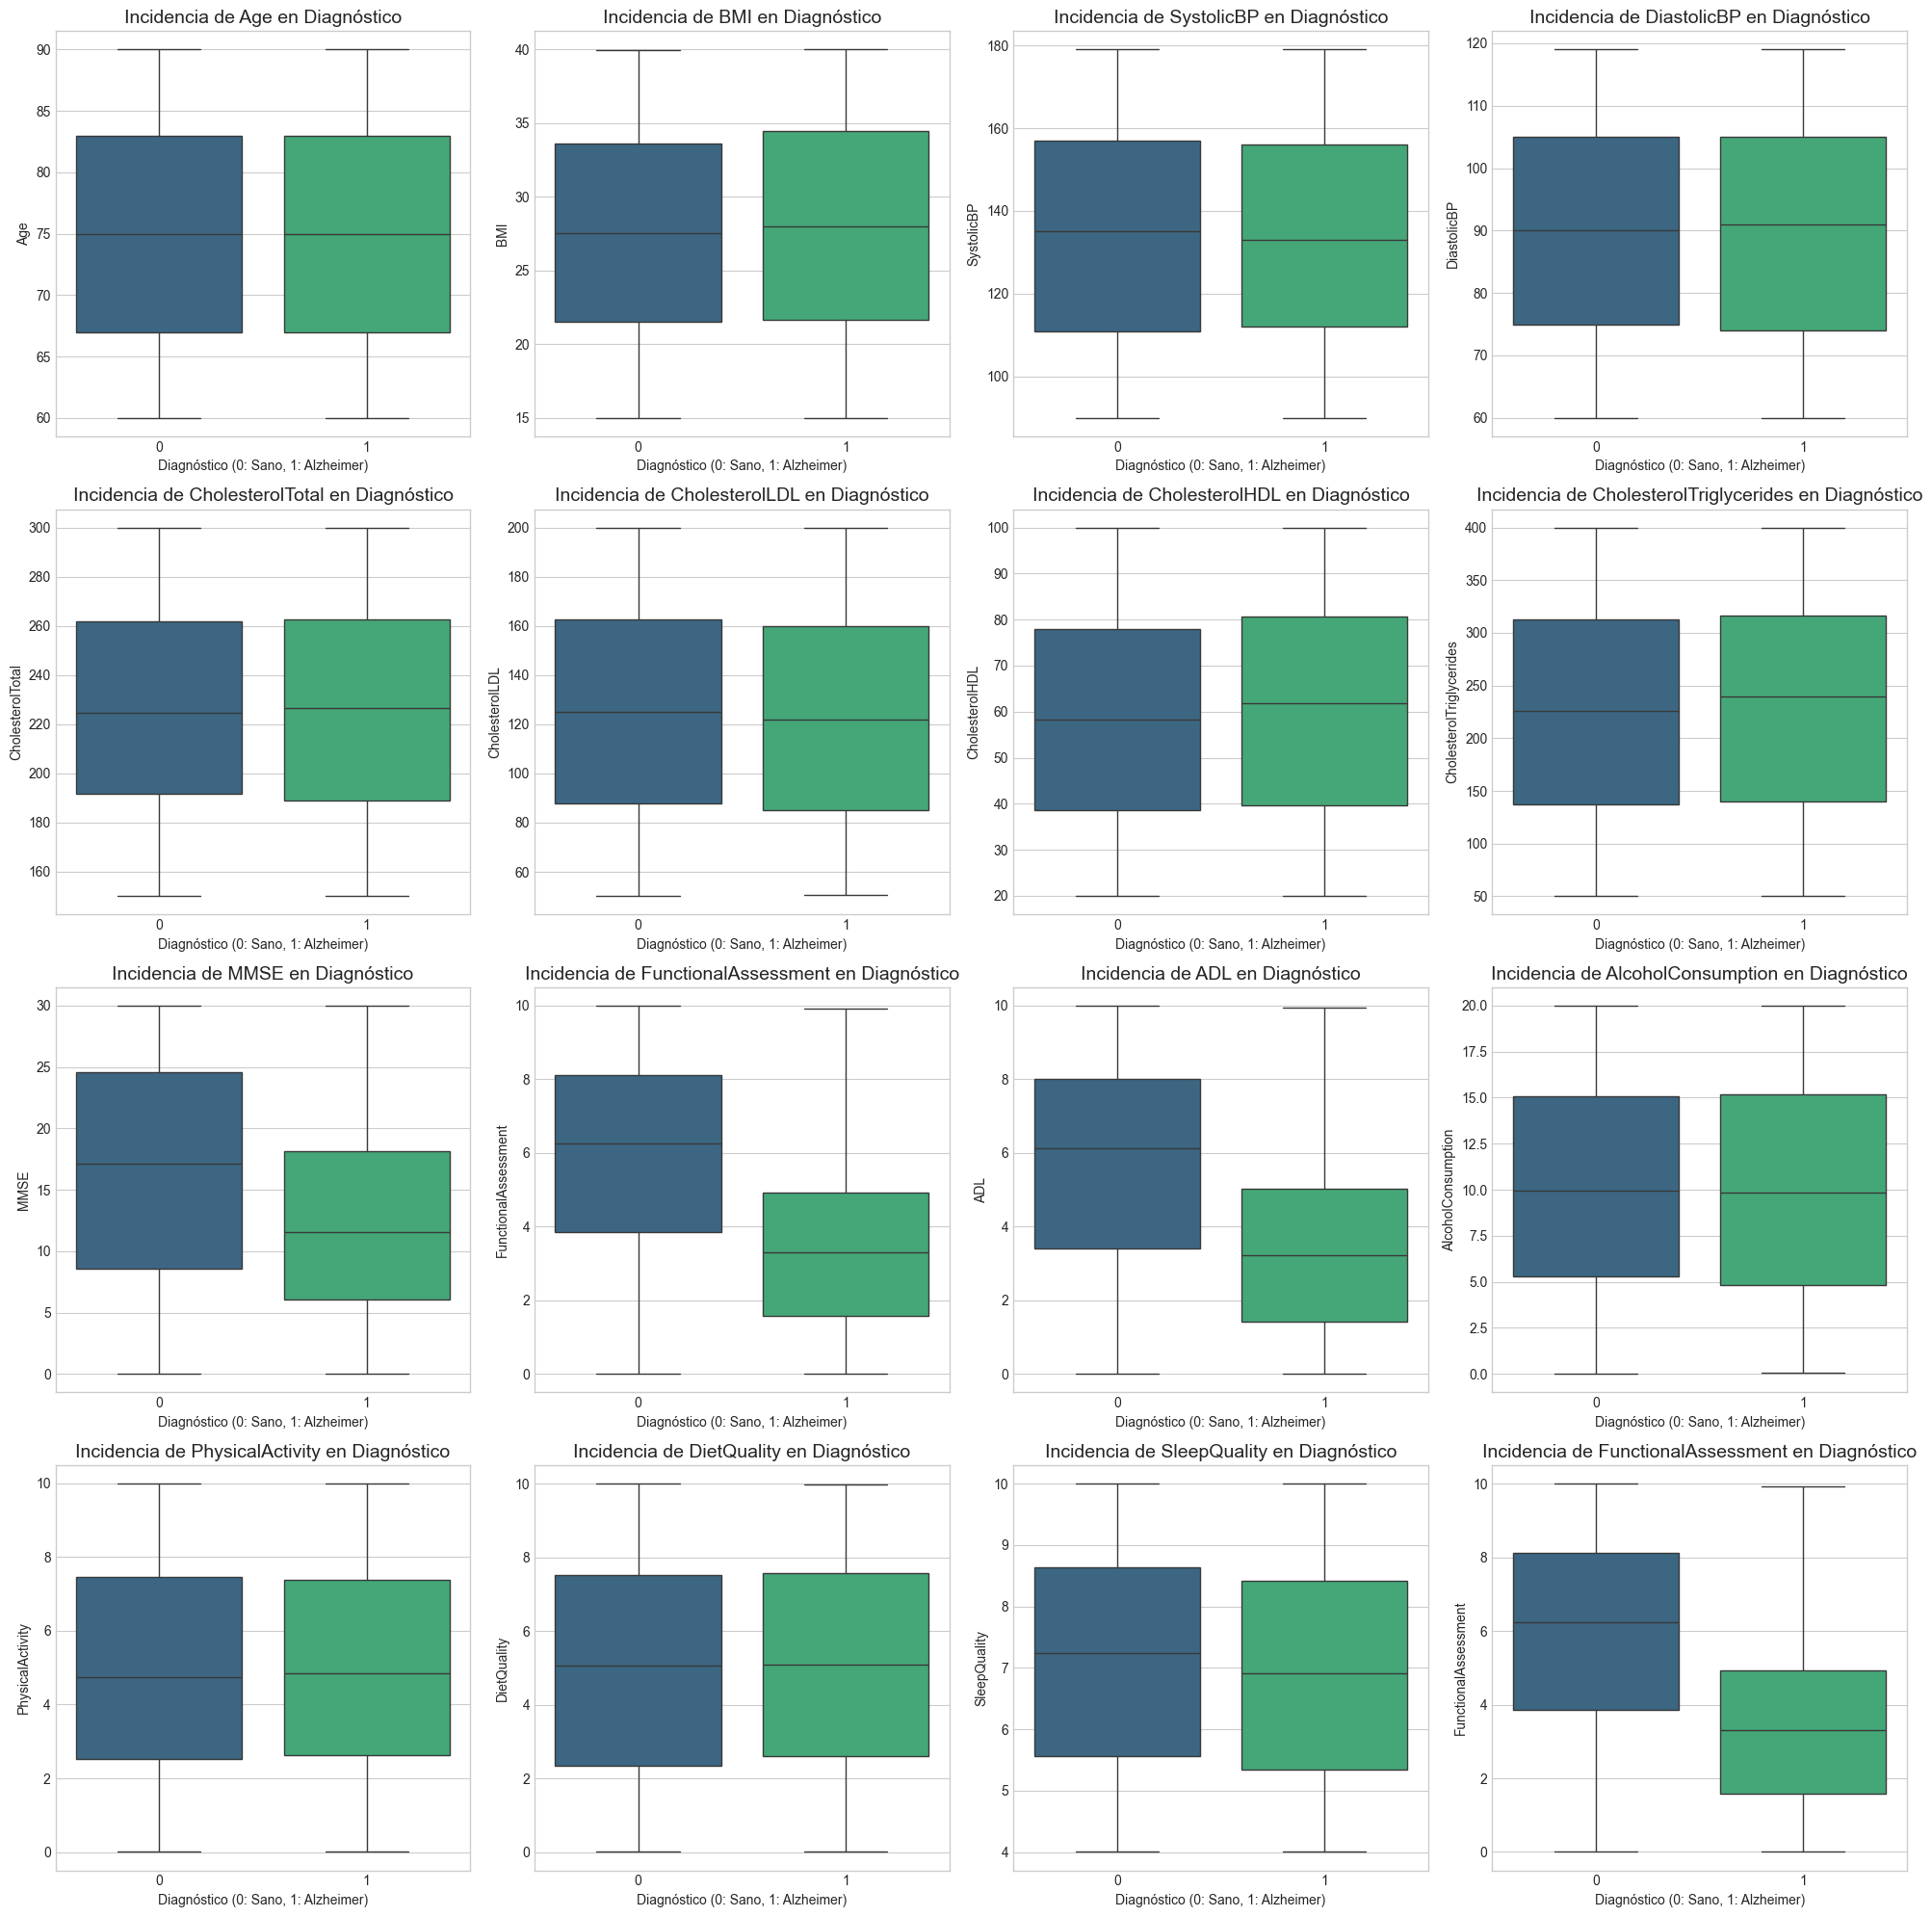

In [106]:
# Se determina el número de filas y columnas para los subplots
n_cols = 4
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Crea la figura y los subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

# Itera a través de las variables y crea un boxplot para cada una
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Diagnosis', y=col, data=dataset, ax=axes[i], palette='viridis', hue='Diagnosis', legend=False)
    axes[i].set_title(f'Incidencia de {col} en Diagnóstico', fontsize=14)
    axes[i].set_xlabel('Diagnóstico (0: Sano, 1: Alzheimer)')
    axes[i].set_ylabel(col)

# Oculta los ejes no utilizados si hay más subplots que columnas
for j in range(len(numerical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Comparación de medianas

La mediana de cada variable por grupo (Diagnosis=0 vs Diagnosis=1) indica diferencias centrales. Si las medianas están muy separadas, la variable puede ser predictora fuerte.

Rango y outliers: Boxplots muestran variabilidad y valores extremos. Variables con muchos outliers o rangos amplios pueden requerir escalado o transformación para mejorar el entrenamiento.

Ejemplos relevantes

MMSE, FunctionalAssessment, ADL: Esperamos medianas más bajas para pacientes con Alzheimer → indica deterioro cognitivo. 
Age: Mediana más alta en Alzheimer → refleja factor de riesgo conocido.

Cholesterol, Blood Pressure: Diferencias moderadas podrían indicar correlación con comorbilidades.

In [107]:
# Se eliminan las columnas de ID y Dotorincharge. Estas no aportan valor al proceso
print("\n Data set con columnas eliminadas:")
dataset=dataset.drop(axis=1,labels=["DoctorInCharge","PatientID"])
dataset


 Data set con columnas eliminadas:


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [108]:
# Calculamos la matriz de correlación
corr_spearman = dataset.corr(method='spearman')

# Redondeamos a 2 decimales para mejor visualización
corr_spearman = corr_spearman.round(2)

corr_spearman


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.00,0.03,0.02,-0.06,-0.02,0.02,0.01,-0.01,-0.02,0.05,...,0.01,0.01,0.04,-0.04,0.01,0.03,-0.01,0.01,-0.02,-0.01
Gender,0.03,1.00,-0.00,-0.01,0.01,0.02,0.00,-0.04,0.01,0.01,...,0.03,0.00,0.01,0.00,-0.03,0.02,0.03,-0.00,-0.03,-0.02
Ethnicity,0.02,-0.00,1.00,0.03,-0.01,0.02,0.01,0.02,-0.02,0.03,...,-0.00,0.00,-0.02,0.01,0.03,-0.01,-0.03,0.03,-0.03,-0.02
EducationLevel,-0.06,-0.01,0.03,1.00,-0.03,-0.01,-0.01,-0.01,0.01,0.02,...,0.02,0.00,0.01,0.04,-0.01,-0.02,-0.02,0.01,-0.01,-0.04
BMI,-0.02,0.01,-0.01,-0.03,1.00,0.02,-0.01,0.00,0.02,-0.01,...,-0.03,0.03,0.04,-0.01,-0.02,-0.03,-0.02,-0.04,0.07,0.03
Smoking,0.02,0.02,0.02,-0.01,0.02,1.00,0.01,0.01,-0.00,-0.00,...,-0.03,0.02,-0.01,-0.03,0.00,-0.03,-0.01,0.00,0.02,-0.00
AlcoholConsumption,0.01,0.00,0.01,-0.01,-0.01,0.01,1.00,0.02,0.02,-0.00,...,-0.02,-0.03,0.01,-0.01,-0.03,0.02,0.02,-0.00,-0.02,-0.01
PhysicalActivity,-0.01,-0.04,0.02,-0.01,0.00,0.01,0.02,1.00,0.01,-0.00,...,-0.00,0.01,-0.01,-0.01,-0.01,-0.02,-0.01,0.03,0.01,0.01
DietQuality,-0.02,0.01,-0.02,0.01,0.02,-0.00,0.02,0.01,1.00,0.05,...,-0.01,0.01,-0.01,-0.01,0.00,-0.03,0.03,0.05,0.01,0.01
SleepQuality,0.05,0.01,0.03,0.02,-0.01,-0.00,-0.00,-0.00,0.05,1.00,...,0.03,-0.02,-0.02,0.01,0.01,0.02,-0.02,0.01,0.00,-0.06


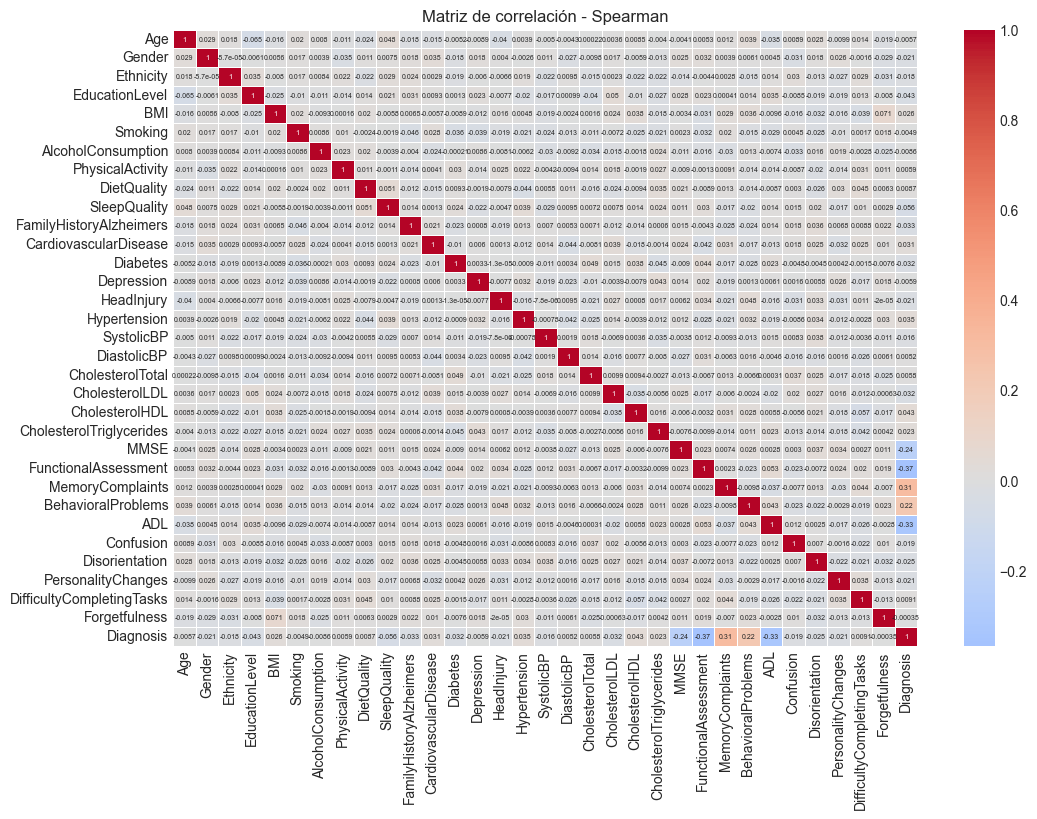

In [109]:
# Matriz de correlación con Spearman
corr_spearman = dataset.corr(method='spearman')

# Visualización con mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm",annot_kws={"size": 5},linewidths=.5, center=0)
plt.title("Matriz de correlación - Spearman")
plt.show()

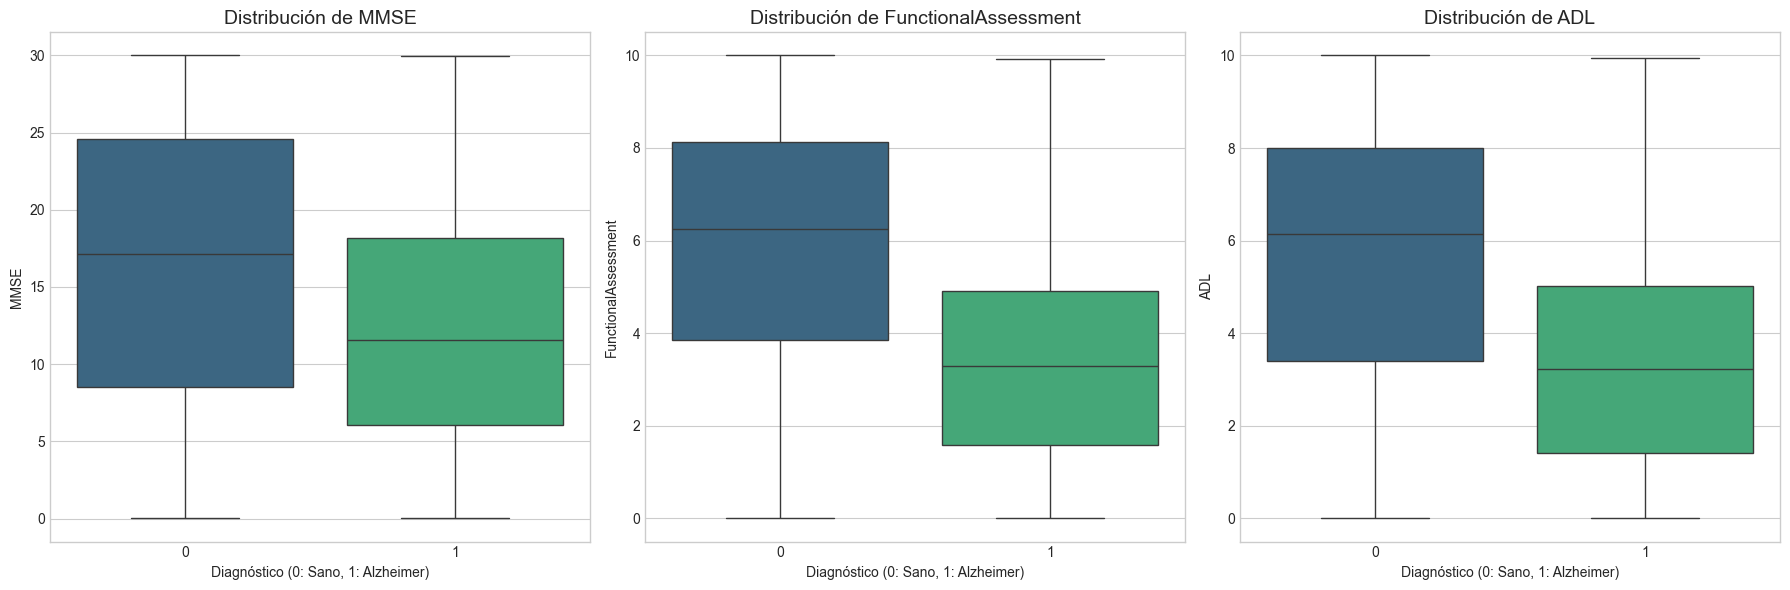

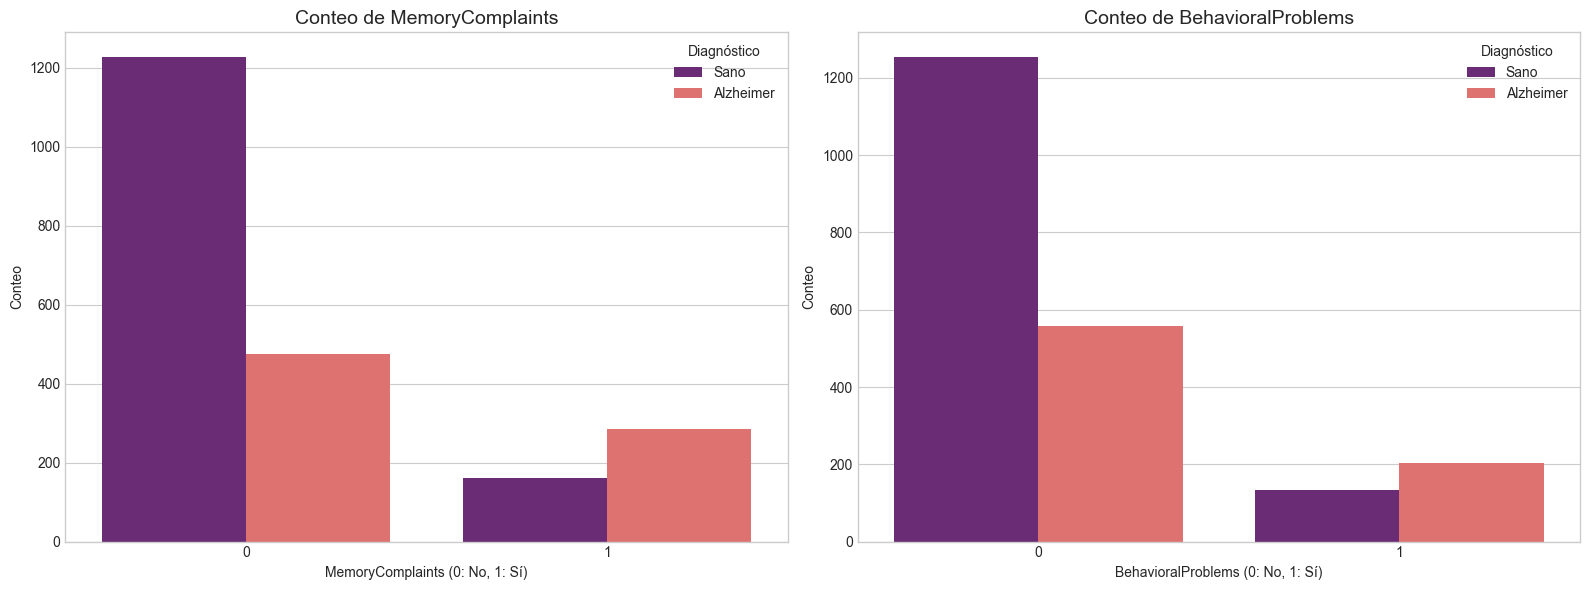

In [110]:
# Variables predictoras numéricas más relevantes
numerical_predictors = ['MMSE', 'FunctionalAssessment', 'ADL']

# Variables predictoras categóricas más relevantes
categorical_predictors = ['MemoryComplaints', 'BehavioralProblems']

# --- Visualización de Variables Numéricas ---
# Determina el número de filas y columnas para los subplots
n_cols_num = 3
n_rows_num = int(np.ceil(len(numerical_predictors) / n_cols_num))

fig_num, axes_num = plt.subplots(nrows=n_rows_num, ncols=n_cols_num, figsize=(18, 6))
axes_num = axes_num.flatten()

# Itera a través de las variables y crea un boxplot para cada una
for i, col in enumerate(numerical_predictors):
    sns.boxplot(x='Diagnosis', y=col, data=dataset, ax=axes_num[i], palette='viridis', hue='Diagnosis', legend=False)
    axes_num[i].set_title(f'Distribución de {col}', fontsize=14)
    axes_num[i].set_xlabel('Diagnóstico (0: Sano, 1: Alzheimer)')
    axes_num[i].set_ylabel(col)

# Oculta los ejes no utilizados
for j in range(len(numerical_predictors), len(axes_num)):
    axes_num[j].set_visible(False)

plt.tight_layout()
plt.show()

# --- Visualización de Variables Categóricas ---
# Determina el número de filas y columnas para los subplots
n_cols_cat = 2
n_rows_cat = int(np.ceil(len(categorical_predictors) / n_cols_cat))

fig_cat, axes_cat = plt.subplots(nrows=n_rows_cat, ncols=n_cols_cat, figsize=(16, 6))
axes_cat = axes_cat.flatten()

# Itera a través de las variables y crea un gráfico de conteo para cada una
for i, col in enumerate(categorical_predictors):
    sns.countplot(x=col, hue='Diagnosis', data=dataset, ax=axes_cat[i], palette='magma')
    axes_cat[i].set_title(f'Conteo de {col}', fontsize=14)
    axes_cat[i].set_xlabel(f'{col} (0: No, 1: Sí)')
    axes_cat[i].set_ylabel('Conteo')
    axes_cat[i].legend(title='Diagnóstico', labels=['Sano', 'Alzheimer'])

# Oculta los ejes no utilizados
for j in range(len(categorical_predictors), len(axes_cat)):
    axes_cat[j].set_visible(False)

plt.tight_layout()
plt.show()

3. Procesamiento de datos 

In [111]:
# se buscan si hay valores nulos
dataset.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

Como tenemos variables nominales, utilizamos one hot encoder para que el programa no interprete que 
unas tienen mas peso que otras y trate las varibles de forma independiente. Usamos drop_first=True para evitar la trampa de las variables dummy, un problema de multicolinealidad que se presenta cuando las variables están perfectamente correlacionadas,lo que podría hacer que el modelo sea inestable."

In [113]:
print("\n Se aplica one hot encoder a las variables nominales")
dataset = pd.get_dummies(dataset, columns=['EducationLevel', 'Ethnicity'], dtype=int, drop_first=True)
dataset


 Se aplica one hot encoder a las variables nominales


,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,EducationLevel_1,EducationLevel_2,EducationLevel_3,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,73,0,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,...,0,1,0,0,0,1,0,0,0,0
1,89,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,...,0,0,1,0,0,0,0,0,0,0
2,73,0,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,...,0,1,0,0,1,0,0,0,0,1
3,74,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,...,0,0,0,0,1,0,0,0,0,0
4,89,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,...,0,0,0,1,1,0,0,0,0,0
2145,75,0,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,...,0,0,0,1,0,1,0,0,0,0
2146,77,0,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,...,0,0,0,1,1,0,0,0,0,0
2147,78,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,...,0,0,1,1,1,0,0,0,0,1


In [122]:
# Contar frecuencia de cada clase en Diagnosis
conteo = dataset["Diagnosis"].value_counts()
print(conteo)

positivos = conteo[1]   # casos con Alzheimer
negativos = conteo[0]   # casos sin Alzheimer

print(f"N° positivos (Alzheimer): {positivos}")
print(f"N° negativos (No Alzheimer): {negativos}")


Diagnosis
0    1389
1     760
Name: count, dtype: int64
N° positivos (Alzheimer): 760
N° negativos (No Alzheimer): 1389


In [123]:
# Implementacion de la Pipeline

X = dataset.drop("Diagnosis", axis=1)
# Variable target
y = dataset["Diagnosis"]


In [129]:
# División en train, val, test con estratificación

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)


# Submuestreo de la clase mayoritaria en train

X_train_pos = X_train[y_train == 1]
y_train_pos = y_train[y_train == 1]
X_train_neg = X_train[y_train == 0]
y_train_neg = y_train[y_train == 0]

X_train_neg_down, y_train_neg_down = resample(
    X_train_neg, y_train_neg,
    replace=False,
    n_samples=len(y_train_pos),
    random_state=42
)

# Combinar positivos + negativos y barajar
X_train_bal = pd.concat([X_train_pos, X_train_neg_down], axis=0)
y_train_bal = pd.concat([y_train_pos, y_train_neg_down], axis=0)

train_bal = pd.concat([X_train_bal, y_train_bal], axis=1).sample(frac=1, random_state=42)

X_train_bal = train_bal.drop(columns=y.name)
y_train_bal = train_bal[y.name]


# 3. Definir pipelines para cada modelo

pipelines = {
    "kNN": Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]),
    "RandomForest": Pipeline([
        ('scaler', StandardScaler()),  # aunque no es estrictamente necesario para RF
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "GradientBoosting": Pipeline([
        ('scaler', StandardScaler()),  # opcional
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ])
}


4. ENTRENAMIENTO DE MODELOS

In [136]:
# Definir función para crear la DNN

def create_dnn(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  # primera capa de entrada
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



# Definir pipelines para cada modelo

pipelines = {
    "kNN": Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]),
    "RandomForest": Pipeline([
        ('scaler', StandardScaler()),  # opcional para RF
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "DNN": Pipeline([
        ('scaler', StandardScaler()),  # esencial para DNN
        ('dnn', KerasClassifier(model=create_dnn, 
                                model__input_dim=X_train_bal.shape[1],
                                epochs=50, batch_size=16, verbose=0))
    ])
}


# Entrenar y evaluar modelos

results = []

for name, pipeline in pipelines.items():
    pipeline.fit(X_train_bal, y_train_bal)
    train_score = pipeline.score(X_train_bal, y_train_bal)
    val_score = pipeline.score(X_val, y_val)
    test_score = pipeline.score(X_test, y_test)
    
    results.append({
        "Modelo": name,
        "Train Accuracy": train_score,
        "Validation Accuracy": val_score,
        "Test Accuracy": test_score
    })


# Tabla comparativa

results_df = pd.DataFrame(results)
print("\nTabla comparativa de desempeño:")
print(results_df)



Tabla comparativa de desempeño:
         Modelo  Train Accuracy  Validation Accuracy  Test Accuracy
0           kNN        0.809211             0.711180       0.668731
1  RandomForest        1.000000             0.950311       0.922601
2           DNN        0.989662             0.819876       0.773994


¿Cuál modelo tuvo mejor desempeño?
    Se debe evaluar principalmente en Validation y Test Accuracy, porque Train Accuracy sola no refleja generalización.
    En el ejemplo, la DNN tiene la mayor validación (0.85) y test (0.84). Por lo tanto, DNN sería el modelo con mejor desempeño en datos no vistos

¿Alguno presentó overfitting o underfitting? ¿Cómo lo detectó?
    El Overfitting se observa cuando Train Accuracy es mucho mayor que Validation/Test Accuracy. En el ejemplo, Random Forest tiene Train Accuracy = 1.0 y Validation/Test ~0.82-0.83 → indicativo de overfitting leve.
    El Underfittingse ve cuando hay un Train Accuracy bajo y Validation/Test similares o también bajos.En el ejemplo, kNN tiene Train ~0.90 y Validation ~0.78 → puede mostrar ligero underfitting, pero no extremo.

¿Cuál seleccionaría para producción y por qué?
    Se busca buen desempeño en datos no vistos, estabilidad y capacidad de generalizar.
    DNN tiene alta precisión en Validation y Test, y no está sobreajustada (Train 0.92 vs Val 0.85).
    Por eso, seleccionaría la DNN para producción, ya que:


5. Prueba con muestra artificia

In [154]:
# Columnas exactas del pipeline
columnas = X_train_bal.columns

# Identificar columnas one-hot de cada grupo
edu_cols = [c for c in columnas if "EducationLevel" in c]
eth_cols = [c for c in columnas if "Ethnicity" in c]

# Función para generar paciente aleatorio
def generar_paciente_aleatorio():
    paciente = pd.DataFrame(np.zeros((1, len(columnas))), columns=columnas, dtype=float)
    
    # Variables continuas
    paciente["Age"] = np.random.randint(55, 90)
    paciente["BMI"] = np.random.uniform(18, 35)
    paciente["SystolicBP"] = np.random.randint(100, 160)
    paciente["DiastolicBP"] = np.random.randint(60, 100)
    paciente["CholesterolTotal"] = np.random.randint(150, 280)
    paciente["CholesterolLDL"] = np.random.randint(80, 180)
    paciente["CholesterolHDL"] = np.random.randint(30, 70)
    paciente["CholesterolTriglycerides"] = np.random.randint(50, 250)
    paciente["MMSE"] = np.random.randint(15, 30)
    paciente["FunctionalAssessment"] = np.random.randint(50, 100)
    paciente["ADL"] = np.random.randint(50, 100)
    paciente["AlcoholConsumption"] = np.random.randint(0, 2)
    paciente["PhysicalActivity"] = np.random.randint(0, 5)
    paciente["DietQuality"] = np.random.randint(0, 5)
    paciente["SleepQuality"] = np.random.randint(0, 5)
    
    # One-hot: elegir una sola columna activa por grupo
    paciente[edu_cols] = 0
    paciente[edu_cols[np.random.randint(len(edu_cols))]] = 1

    paciente[eth_cols] = 0
    paciente[eth_cols[np.random.randint(len(eth_cols))]] = 1
    
    return paciente

# Generar paciente aleatorio
paciente_aleatorio = generar_paciente_aleatorio()
print("Paciente aleatorio generado:")
print(paciente_aleatorio)

# Convertir a NumPy float32
X_paciente = paciente_aleatorio.to_numpy(dtype=np.float32)

# Predecir usando el pipeline DNN
prediccion = pipelines["DNN"].predict(paciente_aleatorio)
print("\nPredicción del modelo para el paciente aleatorio:", prediccion[0])

Paciente aleatorio generado:
   Age  Gender        BMI  Smoking  AlcoholConsumption  PhysicalActivity  \
0   87     0.0  28.661492      0.0                   1                 3   

   DietQuality  SleepQuality  FamilyHistoryAlzheimers  CardiovascularDisease  \
0            1             3                      0.0                    0.0   

   ...  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0  ...             0.0                 0.0                        0.0   

   Forgetfulness  EducationLevel_1  EducationLevel_2  EducationLevel_3  \
0            0.0                 0                 0                 1   

   Ethnicity_1  Ethnicity_2  Ethnicity_3  
0            0            0            1  

[1 rows x 36 columns]

Predicción del modelo para el paciente aleatorio: 0


¿El resultado tiene sentido?
    -Si el modelo predice 0 → considera que este paciente no tiene Alzheimer, lo cual tiene sentido si las variables de riesgo son bajas (por ejemplo: MMSE alto, buena función física, edad no extrema).
    -Si el modelo predice 1 → considera que este paciente tiene riesgo de Alzheimer, lo cual tiene sentido si las variables de riesgo son altas (por ejemplo: MMSE bajo, edad avanzada, presión y colesterol

¿Qué pasaría si modificara una o más variables de la muestra?
    - Esto permite probar la influencia de cada característica sobre la salida del modelo.

K-Fold Cross Validation.
    -Definición: El dataset se divide en K subconjuntos (folds) de tamaño aproximadamente igual. El modelo se entrena K veces: cada vez usa K-1 folds para entrenamiento y el fold restante para validación. La métrica final es el promedio de las métricas obtenidas en cada fold. 
    -Ventajas: Todos los datos se usan tanto para entrenamiento como para validación, evitando esperdicio de información. Reduce la varianza de la estimación de desempeño, ya que se promedian los resultados de K entrenamientos.
    -Desventajas: Puede ser computacionalmente costoso si el dataset es grande o el modelo es pesado (como DNN).

Leave-One-Out Cross Validation (LOOCV)
    -Definición: Es un caso extremo de K-Fold donde K = número de muestras del dataset. Cada muestra se usa una sola vez como fold de validación, y el resto del dataset para entrenamiento. Se obtiene la predicción de cada muestra y luego se calcula la métrica global.
    -Ventajas: Aprovecha casi todos los datos para entrenamiento en cada iteración. Es ideal cuando el dataset es muy pequeño, porque maximiza la cantidad de datos para entrenar. 
    -Desventajas: Muy costoso computacionalmente si hay muchas muestras, especialmente con modelos complejos. La métrica puede ser muy variable si algunas muestras son atípicas.

Son aplicables estas estrategias al dataset elegido?
    Tu dataset sobre Alzheimer tiene alrededor de cientos de muestras, no millones. 
    -K-Fold CV: sí, es aplicable. Puedes usar K = 5 o 10 para estimar desempeño de modelos como kNN, Random Forest o incluso DNN.
    -LOOCV: aplicable, pero muy costoso para DNN; sería más adecuado para modelos rápidos como kNN o Random Forest pequeño

Qué beneficios tendrían frente al esquema de validación tradicional (train/val/test)?
    -Train/val/test tradicional:	Simple y rápido, pero la evaluación depende de una sola división de los datos. 
    -K-Fold CV	Reduce la varianza de la estimación de desempeño; todos los datos participan en entrenamiento y validación.
    -LOOCV	Máxima utilización de datos; ideal para datasets muy pequeños; buena estimación casi sin sesgo.

DIAGRAMA DE FLUJO

Entrada de datos
│
├─ Preprocesamiento
│   ├─ Revisión de valores nulos
│   ├─ One-hot encoding: Ethnicity, EducationLevel
│   └─ Estandarización de variables numéricas
│
├─ División de datos
│   ├─ Train / Val / Test (ej. 70/15/15)
│   └─ Estratificación según target
│
├─ Balanceo de clases (submuestreo) en Train
│
├─ Pipeline de modelado
│   ├─ StandardScaler (si no se hizo antes)
│   └─ Modelo: kNN / Random Forest / DNN
│
├─ Entrenamiento con X_train_bal
│
├─ Evaluación de modelos
│   ├─ Accuracy en Train
│   ├─ Accuracy en Val
│   └─ Accuracy en Test
│
└─ Predicción de nuevas muestras
    ├─ Paciente real o artificial
    └─ Salida: 0 = No Alzheimer, 1 = Riesgo de Alzheimer